In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Import and read the healthcare-dataset-stroke-data.csv.
import pandas as pd 
stroke_df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **EDA & Preprocessing**


In [2]:
# Examine the info for the dataframe
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
# Examine the total NaN values for each column
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
# Create a series of average BMI for each age
avg_bmi_by_age = stroke_df.groupby('age')['bmi'].mean()
avg_bmi_by_age

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.929032
79.00    27.862338
80.00    28.783582
81.00    27.951667
82.00    28.029091
Name: bmi, Length: 104, dtype: float64

In [5]:
# Replace NaN values in the 'bmi' column with the average BMI of the corresponding age
def replace_bmi(row):
    if pd.isna(row['bmi']):
        return avg_bmi_by_age[row['age']]
    else:
        return row['bmi']

stroke_df['bmi'] = stroke_df.apply(replace_bmi, axis=1)

In [6]:
# Check the info of the dataframe (if the NaN values in the 'bmi' column are replaced)
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:ylabel='Count'>

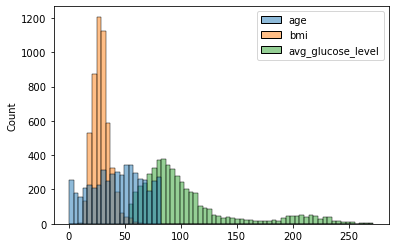

In [7]:
# Examine the distribution of 'age', 'bmi' and 'avg_glucose_level'
sns.histplot(stroke_df[['age', 'bmi', 'avg_glucose_level']])

Text(0.5, 0, 'BMI')

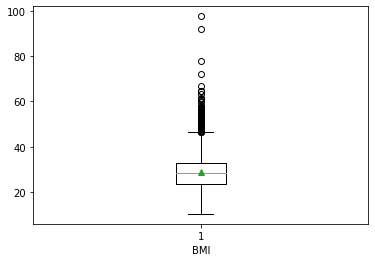

In [14]:
# Look at the distribution of bmi column in closer detail
plt.boxplot(stroke_df['bmi'], showmeans=True)
plt.xlabel('BMI')

In [9]:
# Create bins for the bmi column 
bins = [0, 18, 25, 30, 100]
labels = ['underweight', 'normal', 'overweight', 'obese']
stroke_df['binned_bmi'] = pd.cut(stroke_df['bmi'], bins = bins, labels = labels)

In [10]:
# Check if bins are created successfully 
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,binned_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.190000,never smoked,1,obese
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.783582,never smoked,0,overweight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,obese
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,obese
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,overweight


In [11]:
# Drop the id column
stroke_df = stroke_df.drop(columns = ['id', 'bmi'])

In [12]:
# Determine the number of unique values in each column.
stroke_df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
smoking_status          4
stroke                  2
binned_bmi              4
dtype: int64

<AxesSubplot:>

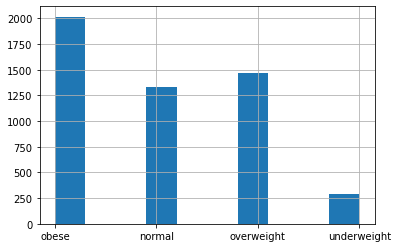

In [13]:
# Check the distribution of the bmi bins
stroke_df['binned_bmi'].hist()

In [14]:
# Look at gender value counts
gender_counts = stroke_df['gender'].value_counts()
gender_counts

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [15]:
# Drop the record with gender = 'Other' (since there is only 1 record)
stroke_df = stroke_df.drop(stroke_df[stroke_df['gender'] == 'Other'].index)

In [16]:
# Check if 'Other' is dropped on gender column
stroke_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
# Look at work type value counts
work_counts = stroke_df['work_type'].value_counts()
work_counts

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [18]:
# Look at smoking status value counts
smoke_counts = stroke_df['smoking_status'].value_counts()
smoke_counts

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [19]:
# Look at the stroke outcome value counts
stroke_counts = stroke_df['stroke'].value_counts()
stroke_counts

0    4860
1     249
Name: stroke, dtype: int64

**Findings:** The `0`s and `1`s in stroke column is highly imbalanced

In [20]:
# Split the data into X and y
y = stroke_df['stroke']
X = stroke_df.drop(columns=['stroke'])

In [21]:
# Dependencies
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN

In [22]:
# Perform oversampling with RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [23]:
# Convert categorical data to numeric with `pd.get_dummies` (only on X, bc y is already 0s and 1s)
X_encoded = pd.get_dummies(X_ros)

In [24]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_encoded)

In [25]:
# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_ros, test_size = 0.2, random_state=1)

## **Train and Evaluate the Model**

### **Train model on resampled data using `RandomOverSampler`** 

In [26]:
# Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [27]:
# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=1)

In [28]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [29]:
# Make predictions on the testing set
predictions = rf_model.predict(X_test)

In [30]:
# Evaluate the model with Confusion Matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)

In [31]:
# Generate a confusion matrix for the model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,951,21
Actual 1,0,972


In [32]:
# Look at the accuracy score 
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9891975308641975


In [33]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       972
           1       0.98      1.00      0.99       972

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



**Evaluation:** In this optimization attempt, we divided the `bmi` column into four categories(or bins) and applied the `RandomOverSampler` technique to oversample the data and utilized it for training our model. As a result, we obtained an accuracy score of approximately 98.9% for predicting both class `0` and `1`. When we compared this outcome with our initial model that didn't involve binning the bmi, we observed that the overall performance decreased slight by 0.2%, while sensitivity and specificity scores all remained unchanged. This suggests that binning the `bmi` column has little to no affect to the overall performance of the model.